In [1]:
import pandas as pd
import geopandas as gpd
import os

pd.options.display.max_columns = None

# Integración de tablas de datos por temática del censo 2020

In [2]:

def merge_censo(folder_path, nivel):
    """
    Lee y fusiona todos los CSVs de un nivel geográfico dado en la carpeta indicada, por CVEGEO.
    
    Parámetros:
    -----------
    folder_path : str  → Ruta a la carpeta con los archivos CSV.
    nivel       : str  → Nivel geográfico a filtrar.
                         Valores posibles: 'manzana', 'ageb_urb', 'municipal',
                         'estatal', 'loc_urb', 'loc_rur', etc.
    """
    prefijo = f'cpv2020_{nivel}_'
    archivos = sorted([
        f for f in os.listdir(folder_path)
        if f.startswith(prefijo)
    ])
    
    if not archivos:
        raise ValueError(f"No se encontraron archivos con el prefijo '{prefijo}' en:\n{folder_path}")
    
    print(f"Nivel '{nivel}' — archivos encontrados: {len(archivos)}")

    base = None
    for f in archivos:
        df = pd.read_csv(
            os.path.join(folder_path, f),
            dtype={'CVEGEO': str},
            low_memory=False
        )
        if base is None:
            base = df
        else:
            # Solo conservamos CVEGEO + columnas que aún no están en base (evita duplicados)
            cols_nuevas = ['CVEGEO'] + [c for c in df.columns if c not in base.columns]
            base = base.merge(df[cols_nuevas], on='CVEGEO', how='outer')
        print(f"  ✓ {f}  →  acumulado: {base.shape}")

    return base


# Nivel manzana

In [3]:

# Estado de México
folder_mex = 'C:/SCINCE 2020/SCINCE 2020/15_MEX/tablas_csv'
df_mex = merge_censo(folder_mex, nivel='manzana')
print(f"\nEstado de México → {df_mex.shape[0]:,} registros | {df_mex.shape[1]} columnas")


Nivel 'manzana' — archivos encontrados: 12
  ✓ cpv2020_manzana_caracteristicas_economicas.csv  →  acumulado: (131559, 47)
  ✓ cpv2020_manzana_discapacidad.csv  →  acumulado: (131559, 87)
  ✓ cpv2020_manzana_educacion.csv  →  acumulado: (131559, 122)
  ✓ cpv2020_manzana_etnicidad.csv  →  acumulado: (131559, 150)
  ✓ cpv2020_manzana_fecundidad.csv  →  acumulado: (131559, 153)
  ✓ cpv2020_manzana_hogares_censales.csv  →  acumulado: (131559, 179)
  ✓ cpv2020_manzana_migracion.csv  →  acumulado: (131559, 209)
  ✓ cpv2020_manzana_mortalidad.csv  →  acumulado: (131559, 210)
  ✓ cpv2020_manzana_religion.csv  →  acumulado: (131559, 218)
  ✓ cpv2020_manzana_servicios_de_salud.csv  →  acumulado: (131559, 238)
  ✓ cpv2020_manzana_situacion_conyugal.csv  →  acumulado: (131559, 246)
  ✓ cpv2020_manzana_vivienda.csv  →  acumulado: (131559, 361)

Estado de México → 131,559 registros | 361 columnas


In [4]:

# CDMX
folder_cdmx = 'C:/SCINCE 2020/SCINCE 2020/09_CDMX/tablas_csv'
df_cdmx = merge_censo(folder_cdmx, nivel='manzana')
print(f"\nCDMX → {df_cdmx.shape[0]:,} registros | {df_cdmx.shape[1]} columnas")


Nivel 'manzana' — archivos encontrados: 12
  ✓ cpv2020_manzana_caracteristicas_economicas.csv  →  acumulado: (66386, 47)
  ✓ cpv2020_manzana_discapacidad.csv  →  acumulado: (66386, 87)
  ✓ cpv2020_manzana_educacion.csv  →  acumulado: (66386, 122)
  ✓ cpv2020_manzana_etnicidad.csv  →  acumulado: (66386, 150)
  ✓ cpv2020_manzana_fecundidad.csv  →  acumulado: (66386, 153)
  ✓ cpv2020_manzana_hogares_censales.csv  →  acumulado: (66386, 179)
  ✓ cpv2020_manzana_migracion.csv  →  acumulado: (66386, 209)
  ✓ cpv2020_manzana_mortalidad.csv  →  acumulado: (66386, 210)
  ✓ cpv2020_manzana_religion.csv  →  acumulado: (66386, 218)
  ✓ cpv2020_manzana_servicios_de_salud.csv  →  acumulado: (66386, 238)
  ✓ cpv2020_manzana_situacion_conyugal.csv  →  acumulado: (66386, 246)
  ✓ cpv2020_manzana_vivienda.csv  →  acumulado: (66386, 361)

CDMX → 66,386 registros | 361 columnas


In [5]:

# Integración de ambos estados en un solo DataFrame
df_censo = pd.concat([df_mex, df_cdmx], ignore_index=True)
print(f"Total integrado → {df_censo.shape[0]:,} manzanas | {df_censo.shape[1]} columnas")
df_censo.head()


Total integrado → 197,945 manzanas | 361 columnas


,CVEGEO,ECO1,ECO1_R,ECO2,ECO2_R,ECO3,ECO3_R,ECO4,ECO4_R,ECO5,ECO5_R,ECO6,ECO6_R,ECO7,ECO7_R,ECO10,ECO10_R,ECO13,ECO13_R,ECO16,ECO16_R,ECO19,ECO19_R,ECO22,ECO22_R,ECO25,ECO25_R,ECO26,ECO26_R,ECO27,ECO27_R,ECO28,ECO28_R,ECO29,ECO29_R,ECO30,ECO30_R,ECO31,ECO31_R,ECO34,ECO34_R,ECO37,ECO37_R,ECO40,ECO40_R,ECO43,ECO43_R,DISC1,DISC1_R,DISC2,DISC2_R,DISC3,DISC3_R,DISC4,DISC4_R,DISC5,DISC5_R,DISC6,DISC6_R,DISC7,DISC7_R,DISC8,DISC8_R,DISC9,DISC9_R,DISC10,DISC10_R,DISC11,DISC11_R,DISC12,DISC12_R,DISC13,DISC13_R,DISC14,DISC14_R,DISC15,DISC15_R,DISC16,DISC16_R,DISC17,DISC17_R,DISC18,DISC18_R,DISC19,DISC19_R,DISC20,DISC20_R,EDU1,EDU1_R,EDU4,EDU4_R,EDU7,EDU7_R,EDU10,EDU10_R,EDU13,EDU13_R,EDU16,EDU16_R,EDU19,EDU19_R,EDU22,EDU22_R,EDU25,EDU25_R,EDU28,EDU28_R,EDU31,EDU31_R,EDU34,EDU34_R,EDU37,EDU37_R,EDU40,EDU40_R,EDU43,EDU43_R,EDU46,EDU46_R,EDU49_R,EDU50_R,EDU51_R,INDI1,INDI1_R,INDI4,INDI4_R,INDI7,INDI7_R,INDI10,INDI10_R,INDI13,INDI13_R,INDI16,INDI16_R,INDI19,INDI19_R,INDI20,INDI20_R,AFRO1,AFRO1_R,AFRO2,AFRO2_R,AFRO3,AFRO3_R,AFRO4,AFRO4_R,AFRO5,AFRO5_R,AFRO6,AFRO6_R,FEC1_R,FEC2_R,FEC3_R,HOGAR1,HOGAR2,HOGAR2_R,HOGAR3,HOGAR3_R,HOGAR4,HOGAR5,HOGAR5_R,HOGAR6,HOGAR6_R,HOGAR7,HOGAR7_R,HOGAR10,HOGAR10_R,HOGAR13,HOGAR13_R,HOGAR16,HOGAR16_R,HOGAR19,HOGAR19_R,HOGAR22,HOGAR22_R,HOGAR25,HOGAR25_R,HOGAR26,HOGAR26_R,MIG1,MIG1_R,MIG2,MIG2_R,MIG3,MIG3_R,MIG4,MIG4_R,MIG5,MIG5_R,MIG6,MIG6_R,MIG7,MIG7_R,MIG8,MIG8_R,MIG9,MIG9_R,MIG10,MIG10_R,MIG11,MIG11_R,MIG12,MIG12_R,MIG13,MIG13_R,MIG14,MIG14_R,MIG15,MIG15_R,MOR1_R,RELIG1,RELIG1_R,RELIG2,RELIG2_R,RELIG3,RELIG3_R,RELIG4,RELIG4_R,SALUD1,SALUD1_R,SALUD2,SALUD2_R,SALUD3,SALUD3_R,SALUD4,SALUD4_R,SALUD5,SALUD5_R,SALUD6,SALUD6_R,SALUD7,SALUD7_R,SALUD8,SALUD8_R,SALUD9,SALUD9_R,SALUD10,SALUD10_R,SCONY1,SCONY1_R,SCONY4,SCONY4_R,SCONY7,SCONY7_R,SCONY10,SCONY10_R,VIV0,VIV1,VIV2,VIV2_R,VIV3,VIV3_R,VIV4,VIV4_R,VIV5,VIV5_R,VIV6,VIV6_R,VIV7,VIV7_R,VIV8,VIV8_R,VIV9,VIV9_R,VIV10,VIV10_R,VIV11,VIV11_R,VIV12,VIV12_R,VIV13,VIV13_R,VIV14,VIV14_R,VIV15,VIV15_R,VIV16,VIV16_R,VIV17,VIV17_R,VIV18,VIV18_R,VIV19,VIV19_R,VIV20,VIV20_R,VIV21,VIV21_R,VIV22,VIV22_R,VIV23,VIV23_R,VIV24,VIV24_R,VIV25,VIV25_R,VIV26,VIV26_R,VIV27,VIV27_R,VIV28,VIV28_R,VIV29,VIV29_R,VIV30,VIV30_R,VIV31,VIV31_R,VIV32,VIV32_R,VIV33,VIV33_R,VIV34,VIV34_R,VIV35,VIV35_R,VIV36,VIV36_R,VIV37,VIV37_R,VIV38,VIV38_R,VIV39,VIV39_R,VIV40,VIV40_R,VIV41,VIV41_R,VIV42,VIV42_R,VIV43,VIV43_R,VIV70,VIV70_R,VIV75,VIV75_R,VIV76,VIV76_R,VIV77,VIV77_R,VIV78,VIV78_R,VIV79,VIV79_R,VIV80,VIV80_R,VIV81,VIV81_R,VIV82,VIV82_R,VIV83,VIV83_R,VIV84,VIV84_R,VIV90,VIV90_R,VIV91,VIV91_R,VIV92_R,VIV93_R,VIV94
0,1500100010127001,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8.0,-8.0,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8.0,-8.0,-8.0,-8,-8,-8.0,-8,-8.0,-8,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,0,-8,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0,-8,-8.0

# Extración de datos de interes

In [6]:
# Lista de variables absolutas (valores brutos) para filtrar
variables = [
    # --- POBLACIÓN BÁSICA ---
    'POB1',      # Población total
    'POB42',     # Población femenina
    'POB84',     # Población masculina
    
    # --- GRUPOS DE EDAD CLAVE (Capital humano potencial) ---
    'POB10',     # Población 15-24 años (jóvenes en edad de formación)
    'POB11',     # Población 15-29 años (jóvenes adultos)
    'POB12',     # Población 15-64 años (PEA potencial)
    'POB14',     # Población 30-49 años (edad productiva principal)
    'POB15',     # Población 50-59 años (edad productiva tardía)
    'POB23',     # Población 60+ años (adultos mayores)
    
    # --- EDUCACIÓN (Capital humano calificado) ---
    'EDU25',     # Población 15+ alfabeta
    'EDU28',     # Población 15+ analfabeta
    'EDU31',     # Población 15+ sin escolaridad
    'EDU37',     # Población 15+ con educación básica completa
    'EDU40',     # Población 15+ con educación posbásica
    'EDU43',     # Población 18+ con al menos un grado de media superior
    'EDU46',     # Población 25+ con al menos un grado de educación superior (CLAVE)
    
    # --- ACTIVIDAD ECONÓMICA ---
    'ECO1',      # Población 12+ económicamente activa
    'ECO4',      # Población 12+ ocupada
    'ECO22',     # Población 12+ ocupada con educación superior/posgrado (CLAVE)
    'ECO25',     # Población 12+ desocupada
    'ECO28',     # Población 12+ no económicamente activa


    # --- VIVIENDA ---
    'VIV1',      # Total de viviendas habitadas
    'VIV2',      # Viviendas particulares habitadas
    'VIV3',      # Ocupantes en viviendas particulares
    'VIV4',      # Viviendas deshabitadas
    
    # --- INFRAESTRUCTURA BÁSICA DE VIVIENDA ---
    'VIV15',     # Viviendas con energía eléctrica
    'VIV17',     # Viviendas con agua entubada
    'VIV23',     # Viviendas con drenaje
    'VIV25',     # Viviendas con servicios completos (luz, agua, drenaje)
    
    # --- TECNOLOGÍAS DE LA INFORMACIÓN (Relevante para hub tecnológico) ---
    'VIV34',     # Viviendas con computadora/laptop/tablet
    'VIV36',     # Viviendas con teléfono celular
    'VIV37',     # Viviendas con Internet (MUY CLAVE)
    'VIV40',     # Viviendas SIN computadora ni Internet
    
    # --- HACINAMIENTO (Calidad de vida) ---
    'VIV8',      # Viviendas con un dormitorio
    'VIV10',     # Viviendas con más de 2.5 ocupantes por dormitorio
]

In [7]:
# DICCIONARIO DE RENOMBRADO
# Variables renombradas a nombres cortos y descriptivos

diccionario_renombrado = {
    # --- POBLACIÓN BÁSICA ---
    'POB1': 'pob_total',
    'POB42': 'pob_fem',
    'POB84': 'pob_masc',
    
    # --- GRUPOS DE EDAD ---
    'POB10': 'pob_15_24',
    'POB11': 'pob_15_29',
    'POB12': 'pob_15_64',
    'POB14': 'pob_30_49',
    'POB15': 'pob_50_59',
    'POB23': 'pob_60_mas',
    
    # --- EDUCACIÓN (ABSOLUTAS) ---
    'EDU25': 'pob_alfabeta',
    'EDU28': 'pob_analfabeta',
    'EDU31': 'pob_sin_escolaridad',
    'EDU37': 'pob_basica_comp',
    'EDU40': 'pob_posbasica',
    'EDU43': 'pob_media_sup',
    'EDU46': 'pob_superior',  # CRÍTICO
    
    # --- ACTIVIDAD ECONÓMICA (ABSOLUTAS) ---
    'ECO1': 'pea',
    'ECO4': 'pob_ocupada',
    'ECO22': 'pob_ocup_sup',  # CRÍTICO
    'ECO25': 'pob_desocupada',
    'ECO28': 'pob_no_pea',
    
    # --- VIVIENDA (ABSOLUTAS) ---
    'VIV1': 'viv_habitadas',
    'VIV2': 'viv_part_hab',
    'VIV3': 'ocup_viv',
    'VIV4': 'viv_deshabitadas',
    
    # --- INFRAESTRUCTURA BÁSICA ---
    'VIV15': 'viv_elect',
    'VIV17': 'viv_agua',
    'VIV23': 'viv_drenaje',
    'VIV25': 'viv_serv_comp',
    # --- TECNOLOGÍA ---
    'VIV34': 'viv_comp',
    'VIV36': 'viv_cel',
    'VIV37': 'viv_internet',  # MUY CRÍTICO
    'VIV40': 'viv_sin_comp_int',
    
    
    # --- HACINAMIENTO ---
    'VIV8': 'viv_1dorm',
    'VIV10': 'viv_hacinada',
    
}

In [8]:
# cargamos base de manzanas
manzanas = gpd.read_file(os.path.join('..', 'datos', '00_insumos','manzanas_zonaestudio.gpkg'))
manzanas.head(1)

,CVEGEO,POB1,POB2,POB2_R,POB4,POB4_R,POB5,POB5_R,POB6,POB6_R,POB7,POB7_R,POB8,POB8_R,POB9,POB9_R,POB10,POB10_R,POB11,POB11_R,POB12,POB12_R,POB13,POB13_R,POB14,POB14_R,POB15,POB15_R,POB17,POB17_R,POB18,POB18_R,POB19,POB19_R,POB20,POB20_R,POB21,POB21_R,POB22,POB22_R,POB23,POB23_R,POB24,POB24_R,POB25,POB25_R,POB42,POB42_R,POB43,POB43_R,POB45,POB45_R,POB46,POB46_R,POB47,POB47_R,POB48,POB48_R,POB49,POB49_R,POB50,POB50_R,POB51,POB51_R,POB52,POB52_R,POB53,POB53_R,POB54,POB54_R,POB55,POB55_R,POB56,POB56_R,POB57,POB57_R,POB59,POB59_R,POB60,POB60_R,POB61,POB61_R,POB62,POB62_R,POB63,POB63_R,POB64,POB64_R,POB65,POB65_R,POB66,POB66_R,POB67,POB67_R,POB84,POB84_R,POB85,POB85_R,POB87,POB87_R,POB88,POB88_R,POB89,POB89_R,POB90,POB90_R,POB91,POB91_R,POB92,POB92_R,POB93,POB93_R,POB94,POB94_R,POB95,POB95_R,POB96,POB96_R,POB97,POB97_R,POB98,POB98_R,POB100,POB100_R,POB101,POB101_R,POB102,POB102_R,POB103,POB103_R,POB104,POB104_R,POB105,POB105_R,POB106,POB106_R,POB107,POB107_R,POB108,POB108_R,POB125_R,POB126_R,POB127_R,POB128_R,POB129_R,POB130_R,POB131_R,POB132_R,POB133_R,POB134_R,POB3,POB3_R,POB16,POB16_R,POB26,POB26_R,POB27,POB27_R,POB28,POB28_R,POB29,POB29_R,POB30,POB30_R,POB31,POB31_R,POB32,POB32_R,POB33,POB33_R,POB34,POB34_R,POB35,POB35_R,POB36,POB36_R,POB37,POB37_R,POB38,POB38_R,POB39,POB39_R,POB40,POB40_R,POB41,POB41_R,POB44,POB44_R,POB58,POB58_R,POB68,POB68_R,POB69,POB69_R,POB70,POB70_R,POB71,POB71_R,POB72,POB72_R,POB73,POB73_R,POB74,POB74_R,POB75,POB75_R,POB76,POB76_R,POB77,POB77_R,POB78,POB78_R,POB79,POB79_R,POB80,POB80_R,POB81,POB81_R,POB82,POB82_R,POB83,POB83_R,POB86,POB86_R,POB99,POB99_R,POB109,POB109_R,POB110,POB110_R,POB111,POB111_R,POB112,POB112_R,POB113,POB113_R,POB114,POB114_R,POB115,POB115_R,POB116,POB116_R,POB117,POB117_R,POB118,POB118_R,POB119,POB119_R,POB120,POB120_R,POB121,POB121_R,POB122,POB122_R,POB123,POB123_R,POB124,POB124_R,OID,layer,path,geometry
0,0900200010398005,142.0,3.0,2.1,5.0,3.5,7.0,4.9,14.0,9.9,8.0,5.6,23.0,16.2,3.0,2.1,26.0,18.3,39.0,27.5,105.0,73.9,23.0,16.2,33.0,23.2,25.0,17.6,139.0,97.9,136.0,95.8,127.0,89.4,119.0,83.8,116.0,81.7,93.0,65.5,22.0,15.5,14.0,9.9,7.0,4.9,71.0,50.0,-6.0,-6.0,-6.0,-6.0,4.0,2.8,6.0,4.2,3.0,2.1,10.0,7.0,0.0,0.0,10.0,7.0,18.0,12.7,36.0,25.4,55.0,38.7,10.0,7.0,18.0,12.7,17.0,12.0,70.0,49.3,69.0,48.6,64.0,45.1,61.0,43.0,61.0,43.0,51.0,35.9,8.0,5.6,6.0,4.2,3.0,2.1,71.0,50.0,-6.0,-6.0,3.0,2.1,3.0,2.1,8.0,5.6,5.0,3.5,13.0,9.2,3.0,2.1,16.0,11.3,21.0,14.8,50.0,35.2,13.0,9.2,15.0,10.6,8.0,5.6,69.0,48.6,67.0,47.2,63.0,44.4,58.0,40.8,55.0,38.7,42.0,29.6,14.0,9.9,8.0,5.6,4.0,2.8,100.0,35.2,21.9,13.3,32.0,36.0,30.0,95.7,80.0,107.7,6.0,4.2,8.0,5.6,8.0,5.6,9.0,6.3,7.0,4.9,19.0,13.4,13.0,9.2,13.0,9.2,7.0,4.9,8.0,5.6,5.0,3.5,16.0,11.3,9.0,6.3,7.0,4.9,3.0,2.1,-6.0,-6.0,0.0,0.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,5.0,3.5,3.0,2.1,3.0,2.1,7.0,4.9,8.0,5.6,6.0,4.2,4.0,2.8,5.0,3.5,3.0,2.1,12.0,8.5,5.0,3.5,3.0,2.1,-6.0,-6.0,-6.0,-6.0,0.0,0.0,-6.0,-6.0,4.0,2.8,6.0,4.2,3.0,2.1,6.0,4.2,4.0,2.8,12.0,8.5,5.0,3.5,7.0,4.9,3.0,2.1,3.0,2.1,-6.0,-6.0,4.0,2.8,4.0,2.8,4.0,2.8,-6.0,-6.0,-6.0,-6.0,0.0,0.0,-6.0,-6.0,17324,manzana,C:\SCINCE 2020\SCINCE 2020\09_CDMX\cartografia...,"MULTIPOLYGON (((483432.725 2153439.42, 483450...."


In [9]:
# unimos a manzanas la información del censo
manzanas_censo = manzanas.merge(df_censo, on='CVEGEO', how='left')
print(manzanas_censo.shape)
manzanas_censo.head(1)

(5700, 622)


,CVEGEO,POB1,POB2,POB2_R,POB4,POB4_R,POB5,POB5_R,POB6,POB6_R,POB7,POB7_R,POB8,POB8_R,POB9,POB9_R,POB10,POB10_R,POB11,POB11_R,POB12,POB12_R,POB13,POB13_R,POB14,POB14_R,POB15,POB15_R,POB17,POB17_R,POB18,POB18_R,POB19,POB19_R,POB20,POB20_R,POB21,POB21_R,POB22,POB22_R,POB23,POB23_R,POB24,POB24_R,POB25,POB25_R,POB42,POB42_R,POB43,POB43_R,POB45,POB45_R,POB46,POB46_R,POB47,POB47_R,POB48,POB48_R,POB49,POB49_R,POB50,POB50_R,POB51,POB51_R,POB52,POB52_R,POB53,POB53_R,POB54,POB54_R,POB55,POB55_R,POB56,POB56_R,POB57,POB57_R,POB59,POB59_R,POB60,POB60_R,POB61,POB61_R,POB62,POB62_R,POB63,POB63_R,POB64,POB64_R,POB65,POB65_R,POB66,POB66_R,POB67,POB67_R,POB84,POB84_R,POB85,POB85_R,POB87,POB87_R,POB88,POB88_R,POB89,POB89_R,POB90,POB90_R,POB91,POB91_R,POB92,POB92_R,POB93,POB93_R,POB94,POB94_R,POB95,POB95_R,POB96,POB96_R,POB97,POB97_R,POB98,POB98_R,POB100,POB100_R,POB101,POB101_R,POB102,POB102_R,POB103,POB103_R,POB104,POB104_R,POB105,POB105_R,POB106,POB106_R,POB107,POB107_R,POB108,POB108_R,POB125_R,POB126_R,POB127_R,POB128_R,POB129_R,POB130_R,POB131_R,POB132_R,POB133_R,POB134_R,POB3,POB3_R,POB16,POB16_R,POB26,POB26_R,POB27,POB27_R,POB28,POB28_R,POB29,POB29_R,POB30,POB30_R,POB31,POB31_R,POB32,POB32_R,POB33,POB33_R,POB34,POB34_R,POB35,POB35_R,POB36,POB36_R,POB37,POB37_R,POB38,POB38_R,POB39,POB39_R,POB40,POB40_R,POB41,POB41_R,POB44,POB44_R,POB58,POB58_R,POB68,POB68_R,POB69,POB69_R,POB70,POB70_R,POB71,POB71_R,POB72,POB72_R,POB73,POB73_R,POB74,POB74_R,POB75,POB75_R,POB76,POB76_R,POB77,POB77_R,POB78,POB78_R,POB79,POB79_R,POB80,POB80_R,POB81,POB81_R,POB82,POB82_R,POB83,POB83_R,POB86,POB86_R,POB99,POB99_R,POB109,POB109_R,POB110,POB110_R,POB111,POB111_R,POB112,POB112_R,POB113,POB113_R,POB114,POB114_R,POB115,POB115_R,POB116,POB116_R,POB117,POB117_R,POB118,POB118_R,POB119,POB119_R,POB120,POB120_R,POB121,POB121_R,POB122,POB122_R,POB123,POB123_R,POB124,POB124_R,OID,layer,path,geometry,ECO1,ECO1_R,ECO2,ECO2_R,ECO3,ECO3_R,ECO4,ECO4_R,ECO5,ECO5_R,ECO6,ECO6_R,ECO7,ECO7_R,ECO10,ECO10_R,ECO13,ECO13_R,ECO16,ECO16_R,ECO19,ECO19_R,ECO22,ECO22_R,ECO25,ECO25_R,ECO26,ECO26_R,ECO27,ECO27_R,ECO28,ECO28_R,ECO29,ECO29_R,ECO30,ECO30_R,ECO31,ECO31_R,ECO34,ECO34_R,ECO37,ECO37_R,ECO40,ECO40_R,ECO43,ECO43_R,DISC1,DISC1_R,DISC2,DISC2_R,DISC3,DISC3_R,DISC4,DISC4_R,DISC5,DISC5_R,DISC6,DISC6_R,DISC7,DISC7_R,DISC8,DISC8_R,DISC9,DISC9_R,DISC10,DISC10_R,DISC11,DISC11_R,DISC12,DISC12_R,DISC13,DISC13_R,DISC14,DISC14_R,DISC15,DISC15_R,DISC16,DISC16_R,DISC17,DISC17_R,DISC18,DISC18_R,DISC19,DISC19_R,DISC20,DISC20_R,EDU1,EDU1_R,EDU4,EDU4_R,EDU7,EDU7_R,EDU10,EDU10_R,EDU13,EDU13_R,EDU16,EDU16_R,EDU19,EDU19_R,EDU22,EDU22_R,EDU25,EDU25_R,EDU28,EDU28_R,EDU31,EDU31_R,EDU34,EDU34_R,EDU37,EDU37_R,EDU40,EDU40_R,EDU43,EDU43_R,EDU46,EDU46_R,EDU49_R,EDU50_R,EDU51_R,INDI1,INDI1_R,INDI4,INDI4_R,INDI7,INDI7_R,INDI10,INDI10_R,INDI13,INDI13_R,INDI16,INDI16_R,INDI19,INDI19_R,INDI20,INDI20_R,AFRO1,AFRO1_R,AFRO2,AFRO2_R,AFRO3,AFRO3_R,AFRO4,AFRO4_R,AFRO5,AFRO5_R,AFRO6,AFRO6_R,FEC1_R,FEC2_R,FEC3_R,HOGAR1,HOGAR2,HOGAR2_R,HOGAR3,HOGAR3_R,HOGAR4,HOGAR5,HOGAR5_R,HOGAR6,HOGAR6_R,HOGAR7,HOGAR7_R,HOGAR10,HOGAR10_R,HOGAR13,HOGAR13_R,HOGAR16,HOGAR16_R,HOGAR19,HOGAR19_R,HOGAR22,HOGAR22_R,HOGAR25,HOGAR25_R,HOGAR26,HOGAR26_R,MIG1,MIG1_R,MIG2,MIG2_R,MIG3,MIG3_R,MIG4,MIG4_R,MIG5,MIG5_R,MIG6,MIG6_R,MIG7,MIG7_R,MIG8,MIG8_R,MIG9,MIG9_R,MIG10,MIG10_R,MIG11,MIG11_R,MIG12,MIG12_R,MIG13,MIG13_R,MIG14,MIG14_R,MIG15,MIG15_R,MOR1_R,RELIG1,RELIG1_R,RELIG2,RELIG2_R,RELIG3,RELIG3_R,RELIG4,RELIG4_R,SALUD1,SALUD1_R,SALUD2,SALUD2_R,SALUD3,SALUD3_R,SALUD4,SALUD4_R,SALUD5,SALUD5_R,SALUD6,SALUD6_R,SALUD7,SALUD7_R,SALUD8,SALUD8_R,SALUD9,SALUD9_R,SALUD10,SALUD10_R,SCONY1,SCONY1_R,SCONY4,SCONY4_R,SCONY7,SCONY7_R,SCONY10,SCONY10_R,VIV0,VIV1,VIV2,VIV2_R,VIV3,VIV3_R,VIV4,VIV4_R,VIV5,VIV5_R,VIV6,VIV6_R,VIV7,VIV7_R,VIV8,VIV8_R,VIV9,VIV9_R,VIV10,VIV10_R,VIV11,VIV11_R,VIV12,VIV12_R,VIV13,VIV13_R,VIV14,VIV14_R,VIV15,VIV15_R,VIV16,VIV16_R,VIV17,VIV17_R,VIV18,VIV18_R,VIV19,VIV19_R,VIV20,VIV20_R,VIV21,VIV21_R,VIV22,VIV22_R,VIV23,VIV23_R,VIV24,VIV24_R,VIV25,VIV25

In [10]:

# Creamos dataframe filtrado con solo las variables seleccionadas
print(manzanas_censo.shape)
manzanas_filtro = manzanas_censo[['CVEGEO', 'geometry'] + variables].copy()
print(manzanas_filtro.shape)
manzanas_filtro.head(1)


(5700, 622)
(5700, 37)


,CVEGEO,geometry,POB1,POB42,POB84,POB10,POB11,POB12,POB14,POB15,POB23,EDU25,EDU28,EDU31,EDU37,EDU40,EDU43,EDU46,ECO1,ECO4,ECO22,ECO25,ECO28,VIV1,VIV2,VIV3,VIV4,VIV15,VIV17,VIV23,VIV25,VIV34,VIV36,VIV37,VIV40,VIV8,VIV10
0,0900200010398005,"MULTIPOLYGON (((483432.725 2153439.42, 483450....",142.0,71.0,71.0,26.0,39.0,105.0,33.0,25.0,22.0,119,0,0,21,84,38,34,79,76,28,3,48,42,42,142,14,42,42,42,42,26,39,32,9,15,12


In [11]:
# Renombramos columnas
manzanas_filtro.rename(columns=diccionario_renombrado, inplace=True)
manzanas_filtro.head(1)

,CVEGEO,geometry,pob_total,pob_fem,pob_masc,pob_15_24,pob_15_29,pob_15_64,pob_30_49,pob_50_59,pob_60_mas,pob_alfabeta,pob_analfabeta,pob_sin_escolaridad,pob_basica_comp,pob_posbasica,pob_media_sup,pob_superior,pea,pob_ocupada,pob_ocup_sup,pob_desocupada,pob_no_pea,viv_habitadas,viv_part_hab,ocup_viv,viv_deshabitadas,viv_elect,viv_agua,viv_drenaje,viv_serv_comp,viv_comp,viv_cel,viv_internet,viv_sin_comp_int,viv_1dorm,viv_hacinada
0,0900200010398005,"MULTIPOLYGON (((483432.725 2153439.42, 483450....",142.0,71.0,71.0,26.0,39.0,105.0,33.0,25.0,22.0,119,0,0,21,84,38,34,79,76,28,3,48,42,42,142,14,42,42,42,42,26,39,32,9,15,12


In [12]:
manzanas_filtro.describe()

,pob_total,pob_fem,pob_masc,pob_15_24,pob_15_29,pob_15_64,pob_30_49,pob_50_59,pob_60_mas,pob_alfabeta,pob_analfabeta,pob_sin_escolaridad,pob_basica_comp,pob_posbasica,pob_media_sup,pob_superior,pea,pob_ocupada,pob_ocup_sup,pob_desocupada,pob_no_pea,viv_habitadas,viv_part_hab,ocup_viv,viv_deshabitadas,viv_elect,viv_agua,viv_drenaje,viv_serv_comp,viv_comp,viv_cel,viv_internet,viv_sin_comp_int,viv_1dorm,viv_hacinada
count,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000
mean,132.380877,68.589825,61.890000,17.001754,27.701228,92.897193,39.204386,16.466842,23.420526,108.735789,-1.870000,-1.571404,17.169649,73.914561,27.902105,36.964561,72.273333,70.426491,31.542281,-1.492982,41.440175,41.078596,39.456316,131.155789,0.074737,40.778596,40.727544,40.753158,40.691754,25.994912,37.614211,31.951754,4.852105,9.206491,3.888596
std,178.714556,94.015413,86.412025,26.725493,42.079188,130.977368,59.834713,24.468847,29.519391,146.667538,4.377531,4.924486,28.856705,103.672287,39.475446,59.013251,103.596590,101.185436,52.923513,5.393821,53.955407,59.301231,54.841234,179.204129,9.916002,59.336958,59.262878,59.328978,59.225906,41.758703,55.857926,48.600772,12.666843,21.719050,12.637843
min,0.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
25%,41.750000,22.000000,19.000000,5.000000,8.000000,29.000000,12.000000,5.000000,7.000000,35.000000,-6.000000,-6.000000,3.000000,24.000000,8.000000,10.000000,22.000000,21.000000,9.000000,-6.000000,13.000000,13.000000,13.000000,41.000000,-6.000000,13.000000,13.000000,13.000000,13.000000,8.000000,12.000000,10.000000,-6.000000,-6.000000,-6.000000
50%,88.000000,46.000000,42.000000,11.000000,18.000000,61.000000,25.000000,12.000000,18.000000,74.000000,0.000000,0.000000,10.000000,51.000000,19.000000,24.000000,47.000000,46.000000,20.000000,0.000000,29.000000,28.000000,27.000000,88.000000,0.000000,28.000000,28.000000,28.000000,28.000000,17.000000,25.000000,21.000000,4.000000,5.000000,3.000000
75%,163.000000,86.000000,77.000000,22.000000,35.000000,114.000000,47.250000,22.000000,33.000000,136.000000,0.000000,0.000000,23.000000,91.000000,36.000000,46.000000,88.000000,86.000000,38.000000,0.000000,54.000000,50.000000,49.000000,163.000000,4.000000,50.000000,50.000000,50.000000,50.000000,31.000000,46.000000,38.000000,9.000000,14.000000,8.000000
max,3702.000000,1897.000000,1805.000000,456.000000,837.000000,2758.000000,1386.000000,413.000000,414.000000,3016.000000,30.000000,36.000000,368.000000,2339.000000,630.000000,1480.000000,2225.000000,2186.000000,1356.000000,48.000000,937.000000,1258.000000,800.000000,3702.000000,394.000000,1258.000000,1258.000000,1258.000000,1258.000000,934.000000,1203.000000,1068.000000,167.000000,408.000000,163.000000


<Axes: >

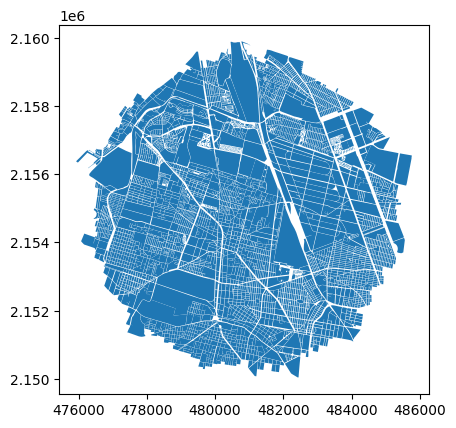

In [13]:
manzanas_filtro.plot()

In [14]:

# Conteo de valores especiales INEGI por columna
# -6 = No aplica | -8 = No especificado / confidencial
cols_num = manzanas_filtro.select_dtypes(include='number').columns
n = len(manzanas_filtro)

resumen_valores_especiales = pd.DataFrame({
    'n_menos_6':   (manzanas_filtro[cols_num] == -6).sum(),
    'pct_menos_6': ((manzanas_filtro[cols_num] == -6).sum() / n * 100).round(1),
    'n_menos_8':   (manzanas_filtro[cols_num] == -8).sum(),
    'pct_menos_8': ((manzanas_filtro[cols_num] == -8).sum() / n * 100).round(1),
}).assign(
    n_especiales=lambda x: x['n_menos_6'] + x['n_menos_8'],
    pct_especiales=lambda x: (x['n_especiales'] / n * 100).round(1),
)

resumen_valores_especiales


,n_menos_6,pct_menos_6,n_menos_8,pct_menos_8,n_especiales,pct_especiales
pob_total,0,0.0,0,0.0,0,0.0
pob_fem,150,2.6,493,8.6,643,11.3
pob_masc,153,2.7,493,8.6,646,11.3
pob_15_24,402,7.1,493,8.6,895,15.7
pob_15_29,246,4.3,493,8.6,739,13.0
pob_15_64,151,2.6,493,8.6,644,11.3
pob_30_49,177,3.1,493,8.6,670,11.8
pob_50_59,385,6.8,493,8.6,878,15.4
pob_60_mas,305,5.4,493,8.6,798,14.0
pob_alfabeta,148,2.6,493,8.6,641,11.2


# Nivel AGEB

In [18]:
# CDMX
folder_cdmx = 'C:/SCINCE 2020/SCINCE 2020/09_CDMX/tablas_csv'
ageb_cdmx = merge_censo(folder_cdmx, nivel='ageb_urb')
print(f"\nCDMX → {ageb_cdmx.shape[0]:,} registros | {ageb_cdmx.shape[1]} columnas")
# Estado de México
folder_mex = 'C:/SCINCE 2020/SCINCE 2020/15_MEX/tablas_csv'
ageb_mex = merge_censo(folder_mex, nivel='ageb_urb')
print(f"\nEstado de México → {ageb_mex.shape[0]:,} registros | {ageb_mex.shape[1]} columnas")

Nivel 'ageb_urb' — archivos encontrados: 12
  ✓ cpv2020_ageb_urb_caracteristicas_economicas.csv  →  acumulado: (2431, 47)
  ✓ cpv2020_ageb_urb_discapacidad.csv  →  acumulado: (2431, 87)
  ✓ cpv2020_ageb_urb_educacion.csv  →  acumulado: (2431, 122)
  ✓ cpv2020_ageb_urb_etnicidad.csv  →  acumulado: (2431, 174)
  ✓ cpv2020_ageb_urb_fecundidad.csv  →  acumulado: (2431, 177)
  ✓ cpv2020_ageb_urb_hogares_censales.csv  →  acumulado: (2431, 227)
  ✓ cpv2020_ageb_urb_migracion.csv  →  acumulado: (2431, 257)
  ✓ cpv2020_ageb_urb_mortalidad.csv  →  acumulado: (2431, 258)
  ✓ cpv2020_ageb_urb_religion.csv  →  acumulado: (2431, 266)
  ✓ cpv2020_ageb_urb_servicios_de_salud.csv  →  acumulado: (2431, 286)
  ✓ cpv2020_ageb_urb_situacion_conyugal.csv  →  acumulado: (2431, 310)
  ✓ cpv2020_ageb_urb_vivienda.csv  →  acumulado: (2431, 425)

CDMX → 2,431 registros | 425 columnas
Nivel 'ageb_urb' — archivos encontrados: 12
  ✓ cpv2020_ageb_urb_caracteristicas_economicas.csv  →  acumulado: (4320, 47)
  ✓ cpv2

In [17]:
# Integración de ambos estados en un solo DataFrame
ageb_censo = pd.concat([ageb_mex, ageb_cdmx], ignore_index=True)
print(f"Total integrado → {ageb_censo.shape[0]:,} manzanas | {ageb_censo.shape[1]} columnas")
ageb_censo.head()

Total integrado → 6,751 manzanas | 425 columnas


,CVEGEO,ECO1,ECO1_R,ECO2,ECO2_R,ECO3,ECO3_R,ECO4,ECO4_R,ECO5,ECO5_R,ECO6,ECO6_R,ECO7,ECO7_R,ECO10,ECO10_R,ECO13,ECO13_R,ECO16,ECO16_R,ECO19,ECO19_R,ECO22,ECO22_R,ECO25,ECO25_R,ECO26,ECO26_R,ECO27,ECO27_R,ECO28,ECO28_R,ECO29,ECO29_R,ECO30,ECO30_R,ECO31,ECO31_R,ECO34,ECO34_R,ECO37,ECO37_R,ECO40,ECO40_R,ECO43,ECO43_R,DISC1,DISC1_R,DISC2,DISC2_R,DISC3,DISC3_R,DISC4,DISC4_R,DISC5,DISC5_R,DISC6,DISC6_R,DISC7,DISC7_R,DISC8,DISC8_R,DISC9,DISC9_R,DISC10,DISC10_R,DISC11,DISC11_R,DISC12,DISC12_R,DISC13,DISC13_R,DISC14,DISC14_R,DISC15,DISC15_R,DISC16,DISC16_R,DISC17,DISC17_R,DISC18,DISC18_R,DISC19,DISC19_R,DISC20,DISC20_R,EDU1,EDU1_R,EDU4,EDU4_R,EDU7,EDU7_R,EDU10,EDU10_R,EDU13,EDU13_R,EDU16,EDU16_R,EDU19,EDU19_R,EDU22,EDU22_R,EDU25,EDU25_R,EDU28,EDU28_R,EDU31,EDU31_R,EDU34,EDU34_R,EDU37,EDU37_R,EDU40,EDU40_R,EDU43,EDU43_R,EDU46,EDU46_R,EDU49_R,EDU50_R,EDU51_R,INDI1,INDI1_R,INDI2,INDI2_R,INDI3,INDI3_R,INDI4,INDI4_R,INDI5,INDI5_R,INDI6,INDI6_R,INDI7,INDI7_R,INDI8,INDI8_R,INDI9,INDI9_R,INDI10,INDI10_R,INDI11,INDI11_R,INDI12,INDI12_R,INDI13,INDI13_R,INDI14,INDI14_R,INDI15,INDI15_R,INDI16,INDI16_R,INDI17,INDI17_R,INDI18,INDI18_R,INDI19,INDI19_R,INDI20,INDI20_R,AFRO1,AFRO1_R,AFRO2,AFRO2_R,AFRO3,AFRO3_R,AFRO4,AFRO4_R,AFRO5,AFRO5_R,AFRO6,AFRO6_R,FEC1_R,FEC2_R,FEC3_R,HOGAR1,HOGAR2,HOGAR2_R,HOGAR3,HOGAR3_R,HOGAR4,HOGAR5,HOGAR5_R,HOGAR6,HOGAR6_R,HOGAR7,HOGAR7_R,HOGAR8,HOGAR8_R,HOGAR9,HOGAR9_R,HOGAR10,HOGAR10_R,HOGAR11,HOGAR11_R,HOGAR12,HOGAR12_R,HOGAR13,HOGAR13_R,HOGAR14,HOGAR14_R,HOGAR15,HOGAR15_R,HOGAR16,HOGAR16_R,HOGAR17,HOGAR17_R,HOGAR18,HOGAR18_R,HOGAR19,HOGAR19_R,HOGAR20,HOGAR20_R,HOGAR21,HOGAR21_R,HOGAR22,HOGAR22_R,HOGAR23,HOGAR23_R,HOGAR24,HOGAR24_R,HOGAR25,HOGAR25_R,HOGAR26,HOGAR26_R,MIG1,MIG1_R,MIG2,MIG2_R,MIG3,MIG3_R,MIG4,MIG4_R,MIG5,MIG5_R,MIG6,MIG6_R,MIG7,MIG7_R,MIG8,MIG8_R,MIG9,MIG9_R,MIG10,MIG10_R,MIG11,MIG11_R,MIG12,MIG12_R,MIG13,MIG13_R,MIG14,MIG14_R,MIG15,MIG15_R,MOR1_R,RELIG1,RELIG1_R,RELIG2,RELIG2_R,RELIG3,RELIG3_R,RELIG4,RELIG4_R,SALUD1,SALUD1_R,SALUD2,SALUD2_R,SALUD3,SALUD3_R,SALUD4,SALUD4_R,SALUD5,SALUD5_R,SALUD6,SALUD6_R,SALUD7,SALUD7_R,SALUD8,SALUD8_R,SALUD9,SALUD9_R,SALUD10,SALUD10_R,SCONY1,SCONY1_R,SCONY2,SCONY2_R,SCONY3,SCONY3_R,SCONY4,SCONY4_R,SCONY5,SCONY5_R,SCONY6,SCONY6_R,SCONY7,SCONY7_R,SCONY8,SCONY8_R,SCONY9,SCONY9_R,SCONY10,SCONY10_R,SCONY11,SCONY11_R,SCONY12,SCONY12_R,VIV0,VIV1,VIV2,VIV2_R,VIV3,VIV3_R,VIV4,VIV4_R,VIV5,VIV5_R,VIV6,VIV6_R,VIV7,VIV7_R,VIV8,VIV8_R,VIV9,VIV9_R,VIV10,VIV10_R,VIV11,VIV11_R,VIV12,VIV12_R,VIV13,VIV13_R,VIV14,VIV14_R,VIV15,VIV15_R,VIV16,VIV16_R,VIV17,VIV17_R,VIV18,VIV18_R,VIV19,VIV19_R,VIV20,VIV20_R,VIV21,VIV21_R,VIV22,VIV22_R,VIV23,VIV23_R,VIV24,VIV24_R,VIV25,VIV25_R,VIV26,VIV26_R,VIV27,VIV27_R,VIV28,VIV28_R,VIV29,VIV29_R,VIV30,VIV30_R,VIV31,VIV31_R,VIV32,VIV32_R,VIV33,VIV33_R,VIV34,VIV34_R,VIV35,VIV35_R,VIV36,VIV36_R,VIV37,VIV37_R,VIV38,VIV38_R,VIV39,VIV39_R,VIV40,VIV40_R,VIV41,VIV41_R,VIV42,VIV42_R,VIV43,VIV43_R,VIV70,VIV70_R,VIV75,VIV75_R,VIV76,VIV76_R,VIV77,VIV77_R,VIV78,VIV78_R,VIV79,VIV79_R,VIV80,VIV80_R,VIV81,VIV81_R,VIV82,VIV82_R,VIV83,VIV83_R,VIV84,VIV84_R,VIV90,VIV90_R,VIV91,VIV91_R,VIV92_R,VIV93_R,VIV94
0,1500100010127,1749,64.9,865,58.1,884,73.2,1704,97.4,852,98.5,852,96.4,15,0.9,192,11.3,38,2.2,312,18.3,393,23.1,753,44.2,45,2.6,13,1.5,32,3.6,942,35.0,621,41.7,321,26.6,129,13.7,373,39.6,346,36.7,45,4.8,49,5.2,167,5.0,77,4.3,90,5.7,12,1.5,64,3.1,91,19.7,71,42.5,61,36.5,18,10.8,40,24.0,18,10.8,40,24.0,31,0.9,2786,82.6,412,12.2,242,13.5,170,10.8,25,3.0,236,11.3,151,32.6,117,66.9,58,33.1,321,99.4,-6,-6.0,140,94.0,9,6.0,346,98.3,3,0.9,2503,98.3,41,1.6,51,2.0,363,14.3,468,18.4,1662,65.3,517,21.7,849,42.7,11.9,11.9,11.8,59,1.8,34,2.0,25,1.7,0,0.0,0,0.0,0,0.0,58,1.8,33,1.9,25,1.7,59,1.9,34,2.1,25,1.8,0,0.0,0,0.0,0,0.0,58,1.9,33,2.0,25,1.8,41,4.5,162,4.8,18,0.5,9,0.5,9,0.6,4,0.5,10,0.5,4,0.9,1.9,1.3,10.8,921,333,36.2,588,63.8,3373,1082,32.1,2291,67.9,107,11.6,39,11.7,68,11.6,319,9.5,110,10.2,209,9.1,524,56.9,190,57.1,334,56.8,2027,60.1,655,60.5,1372,59.9,290,31.5,104,31.2,186,31.6,1027,

In [23]:
ageb = gpd.read_file(os.path.join('..', 'datos', '00_insumos','agebs_zonaestudio.gpkg'))
# unimos a ageb la información del datos
ageb_datos = ageb.merge(ageb_censo, on='CVEGEO', how='left')
print(ageb_datos.shape)
ageb_datos.head(1)
# Creamos dataframe filtrado con solo las variables seleccionadas
print(ageb_datos.shape)
ageb_filtro = ageb_datos[['CVEGEO', 'geometry'] + variables].copy()
print(ageb_filtro.shape)
ageb_filtro.head(1)
# Renombramos columnas
ageb_filtro.rename(columns=diccionario_renombrado, inplace=True)
ageb_filtro.head(1)

(222, 686)
(222, 686)
(222, 37)


,CVEGEO,geometry,pob_total,pob_fem,pob_masc,pob_15_24,pob_15_29,pob_15_64,pob_30_49,pob_50_59,pob_60_mas,pob_alfabeta,pob_analfabeta,pob_sin_escolaridad,pob_basica_comp,pob_posbasica,pob_media_sup,pob_superior,pea,pob_ocupada,pob_ocup_sup,pob_desocupada,pob_no_pea,viv_habitadas,viv_part_hab,ocup_viv,viv_deshabitadas,viv_elect,viv_agua,viv_drenaje,viv_serv_comp,viv_comp,viv_cel,viv_internet,viv_sin_comp_int,viv_1dorm,viv_hacinada
0,0900500010436,"MULTIPOLYGON (((483024.426 2158261.286, 482944...",4302.0,2259.0,2043.0,575.0,879.0,2965.0,1208.0,600.0,926.0,3579,33,57,679,2256,1031,990,2352,2293,859,59,1416,1299,1293,4302,86,1298,1298,1298,1298,734,1174,971,276,453,258


<Axes: >

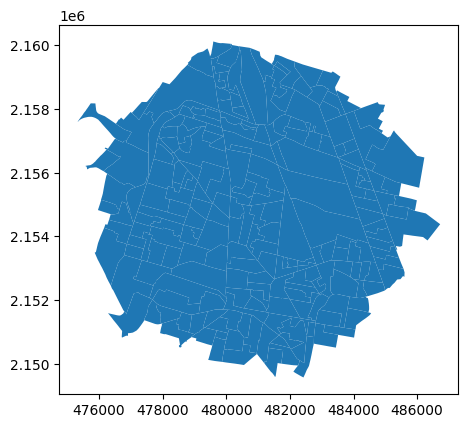

In [25]:
ageb_filtro.plot()

In [24]:

# Conteo de valores especiales INEGI por columna
# -6 = No aplica | -8 = No especificado / confidencial
_ageb = ageb_filtro.select_dtypes(include='number').columns
n = len(ageb_filtro)

resumen_valores_especiales_ageb = pd.DataFrame({
    'n_menos_6':   (ageb_filtro[_ageb] == -6).sum(),
    'pct_menos_6': ((ageb_filtro[_ageb] == -6).sum() / n * 100).round(1),
    'n_menos_8':   (ageb_filtro[_ageb] == -8).sum(),
    'pct_menos_8': ((ageb_filtro[_ageb] == -8).sum() / n * 100).round(1),
}).assign(
    n_especiales=lambda x: x['n_menos_6'] + x['n_menos_8'],
    pct_especiales=lambda x: (x['n_especiales'] / n * 100).round(1),
)

resumen_valores_especiales_ageb


,n_menos_6,pct_menos_6,n_menos_8,pct_menos_8,n_especiales,pct_especiales
pob_total,0,0.0,0,0.0,0,0.0
pob_fem,3,1.4,4,1.8,7,3.2
pob_masc,3,1.4,4,1.8,7,3.2
pob_15_24,3,1.4,4,1.8,7,3.2
pob_15_29,3,1.4,4,1.8,7,3.2
pob_15_64,3,1.4,4,1.8,7,3.2
pob_30_49,3,1.4,4,1.8,7,3.2
pob_50_59,3,1.4,4,1.8,7,3.2
pob_60_mas,4,1.8,4,1.8,8,3.6
pob_alfabeta,3,1.4,4,1.8,7,3.2


# Tratamiento de datos censurados

Los datos del Censo 2020 usan dos códigos especiales:

| Código | Significado | Tratamiento |
|--------|-------------|-------------|
| **-6** | **No aplica** — la categoría no existe para esa unidad geográfica | → `0` (equivale a cero en datos de conteo) |
| **-8** | **No especificado / confidencial** — INEGI suprime recuentos ≤ 5 para proteger la identidad | → configurable: `NaN`, `0`, mediana, valor bajo (~3) |

Las funciones se encuentran en `utils_censo.py` (mismo directorio que este notebook).

In [26]:
from utils_censo import (
    diagnostico_censurados,
    tratar_no_aplica,
    tratar_confidencial,
    tratar_censurados,
    marcar_censurados,
)

## Nivel manzana — tratamiento

In [27]:
# ── Opción A: tratamiento estándar recomendado ────────────────────────────
#   -6  → 0    (no aplica = cero en conteo)
#   -8  → NaN  (confidencial = dato faltante; preserva la incertidumbre)
#
# Otras opciones para metodo_conf: 'cero', 'mediana', 'media', 'valor_bajo'

manzanas_limpio = tratar_censurados(manzanas_filtro, metodo_conf="nan")

# Verificación: no deben quedar -6 ni -8
assert not (manzanas_limpio.select_dtypes("number") == -6).any().any(), "Quedan valores -6"
assert not (manzanas_limpio.select_dtypes("number") == -8).any().any(), "Quedan valores -8"

print(f"\nShape final: {manzanas_limpio.shape}")
print(f"NaN por columna (procedentes de -8):")
display(manzanas_limpio.select_dtypes("number").isna().sum()[
    manzanas_limpio.select_dtypes("number").isna().sum() > 0
].to_frame("n_nan"))

── Tratamiento de datos censurados ──────────────────────────────
[tratar_no_aplica] 33 columnas afectadas | 16,964 celdas reemplazadas (-6 → 0.0)
[tratar_confidencial] 34 columnas afectadas | 16,762 celdas tratadas (método='nan')
─────────────────────────────────────────────────────────────────

Shape final: (5700, 37)
NaN por columna (procedentes de -8):


,n_nan
pob_fem,493
pob_masc,493
pob_15_24,493
pob_15_29,493
pob_15_64,493
pob_30_49,493
pob_50_59,493
pob_60_mas,493
pob_alfabeta,493
pob_analfabeta,493


In [28]:
# ── Opción B: tratamiento conservador (todo a 0) ──────────────────────────
# Útil si el análisis posterior no admite NaN (ej. índices compuestos).
# -6 → 0 y -8 → 0  (subestima, pero es completo sin imputación)

manzanas_limpio_0 = tratar_censurados(manzanas_filtro, metodo_conf="cero")

# ── Opción C: imputación por valor bajo (~3) ──────────────────────────────
# Cuando se sabe que el valor real es pequeño pero positivo.
# INEGI suprime recuentos ≤ 5, por lo que 3 es un estimado central razonable.

manzanas_limpio_vb = tratar_censurados(manzanas_filtro, metodo_conf="valor_bajo", valor_bajo=3)

── Tratamiento de datos censurados ──────────────────────────────
[tratar_no_aplica] 33 columnas afectadas | 16,964 celdas reemplazadas (-6 → 0.0)
[tratar_confidencial] 34 columnas afectadas | 16,762 celdas tratadas (método='cero')
─────────────────────────────────────────────────────────────────
── Tratamiento de datos censurados ──────────────────────────────
[tratar_no_aplica] 33 columnas afectadas | 16,964 celdas reemplazadas (-6 → 0.0)
[tratar_confidencial] 34 columnas afectadas | 16,762 celdas tratadas (método='valor_bajo')
─────────────────────────────────────────────────────────────────


## Nivel AGEB — tratamiento

In [29]:
# Tratamiento estándar para el nivel AGEB
ageb_limpio = tratar_censurados(ageb_filtro, metodo_conf="nan")

assert not (ageb_limpio.select_dtypes("number") == -6).any().any(), "Quedan valores -6"
assert not (ageb_limpio.select_dtypes("number") == -8).any().any(), "Quedan valores -8"

print(f"\nShape final: {ageb_limpio.shape}")
print(f"NaN por columna (procedentes de -8):")
display(ageb_limpio.select_dtypes("number").isna().sum()[
    ageb_limpio.select_dtypes("number").isna().sum() > 0
].to_frame("n_nan"))

── Tratamiento de datos censurados ──────────────────────────────
[tratar_no_aplica] 33 columnas afectadas | 119 celdas reemplazadas (-6 → 0.0)
[tratar_confidencial] 34 columnas afectadas | 136 celdas tratadas (método='nan')
─────────────────────────────────────────────────────────────────

Shape final: (222, 37)
NaN por columna (procedentes de -8):


,n_nan
pob_fem,4
pob_masc,4
pob_15_24,4
pob_15_29,4
pob_15_64,4
pob_30_49,4
pob_50_59,4
pob_60_mas,4
pob_alfabeta,4
pob_analfabeta,4


## Marcado de censurados (flags opcionales)

Si necesitas saber exactamente qué celdas tenían valores censurados *antes* de limpiar, `marcar_censurados` agrega columnas boolean de bandera sin modificar los valores originales. Puedes usarlas para análisis de sensibilidad o para excluir manzanas muy afectadas.

In [30]:
# Agregar flags ANTES de limpiar (preserva la info de qué estaba censurado)
manzanas_con_flags = marcar_censurados(manzanas_filtro)

# Ejemplo: manzanas donde pob_fem era confidencial (-8)
display(
    manzanas_con_flags[manzanas_con_flags["pob_fem_flag_conf"]][["CVEGEO", "pob_fem", "pob_fem_flag_conf"]].head()
)

[marcar_censurados] 67 columnas flag agregadas


,CVEGEO,pob_fem,pob_fem_flag_conf
61,0900500011078001,-8.0,True
72,090020001035A010,-8.0,True
77,090020001035A001,-8.0,True
80,0900200010345008,-8.0,True
98,0900200010631027,-8.0,True


# exportar datos

In [32]:
manzanas_limpio.to_file(os.path.join('..', 'datos', '01_procesos', 'manzanas_datoscenso_zecditvallejo.gpkg'))
ageb_limpio.to_file(os.path.join('..', 'datos', '01_procesos', 'agebs_datoscenso_zecditvallejo.gpkg'))